# Matplotlib

Biblioteca de criação de gráficos - muito boa por sinal, usei bastante antes de começar o curso - que permite criar gráficos simples e avançados.

Há 2 métodos principais de plotar gráficos:

1. API Pyplot: plotar gráficos estilo matlab, menos flexível.
2. OOP: plotar gráficos com orientação à objetos. Muda um pouco e é mais flexível 

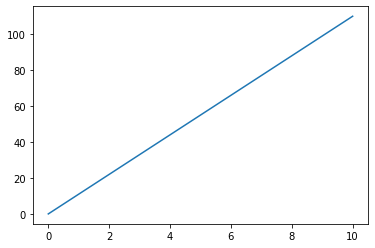

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

x = np.arange(0, 11, 1)
y = x * 11

# api pyplot
plt.plot(x, y)

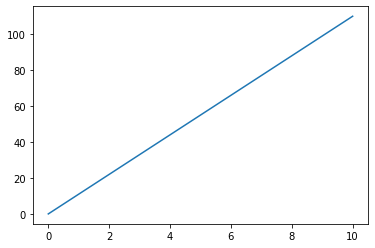

In [36]:
# Usando OOP

fig, ax = plt.subplots()
ax.plot(x,y)

## Anatomia de um plot

Figura é a parte externa, eixo é a interna. Os dados ficam nos eixos, os complementos na figura.

![](./matplotlib-anatomy-of-a-plot.png)

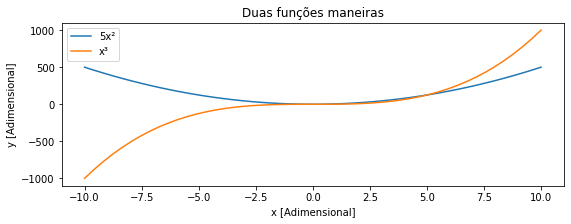

In [37]:
x = np.linspace(-10,10, 50)
y1 = np.power(x, 2) * 5
y2 = np.power(x, 3)

fig, ax = plt.subplots(figsize=(9,3))

ax.plot(x,y1, label=r'5x²')
ax.plot(x,y2, label=r'x³')

ax.set(title ='Duas funções maneiras',
       xlabel ='x [Adimensional]',
       ylabel = 'y [Adimensional]')
       
ax.legend(loc='best')

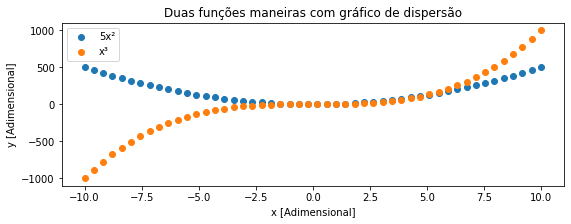

In [38]:
fig, ax = plt.subplots(figsize=(9,3))

ax.scatter(x, y1, label=r'5x²')
ax.scatter(x, y2, label=r'x³')

ax.set(title='Duas funções maneiras com gráfico de dispersão',
       xlabel='x [Adimensional]',
       ylabel='y [Adimensional]')

ax.legend(loc='best')


[Text(0.5, 1.0, 'Doces da nittasi'),
 Text(0.5, 0, 'Doces'),
 Text(0, 0.5, 'Preço (R$)')]

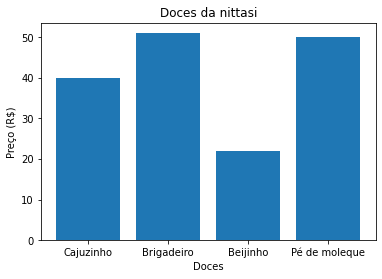

In [39]:
doces = {"Cajuzinho": 40,
         "Brigadeiro": 51,
         "Beijinho": 22,
         "Pé de moleque": 50}

fig, ax = plt.subplots()

ax.bar(doces.keys(), doces.values())
ax.set(title="Doces da nittasi",
       xlabel="Doces",
       ylabel="Preço (R$)")

[Text(0.5, 1.0, 'Doces da nittasi'),
 Text(0, 0.5, 'Doces'),
 Text(0.5, 0, 'Preço (R$)')]

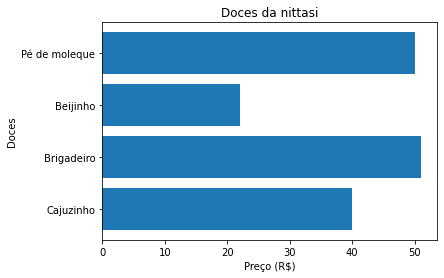

In [40]:
fig, ax = plt.subplots()

ax.barh(list(doces.keys()), list(doces.values()))
ax.set(title="Doces da nittasi",
       ylabel="Doces",
       xlabel="Preço (R$)")


(array([ 10.,  25., 100., 200., 241., 229., 132.,  41.,  18.,   4.]),
 array([-3.08984117, -2.43541904, -1.78099691, -1.12657477, -0.47215264,
         0.18226949,  0.83669162,  1.49111375,  2.14553589,  2.79995802,
         3.45438015]),
 <BarContainer object of 10 artists>)

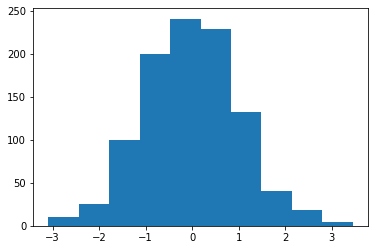

In [41]:
x = np.random.randn(1000)

fig, ax = plt.subplots()
ax.hist(x)

(array([ 3.,  2.,  9., 20., 22., 18., 14.,  8.,  2.,  2.]),
 array([-2.57199594, -2.0167564 , -1.46151686, -0.90627733, -0.35103779,
         0.20420174,  0.75944128,  1.31468082,  1.86992035,  2.42515989,
         2.98039943]),
 <BarContainer object of 10 artists>)

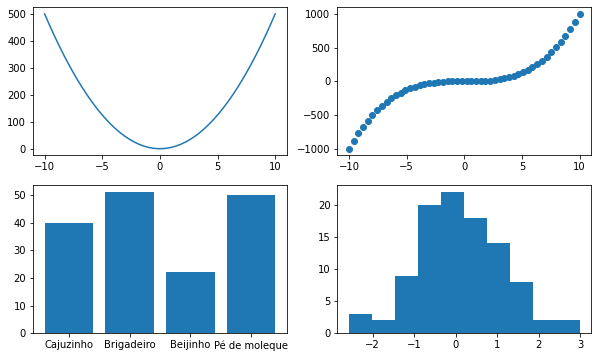

In [42]:
x = np.linspace(-10, 10, 50)
y1 = np.power(x, 2) * 5
y2 = np.power(x, 3)
x_norm = np.random.randn(100)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,6))
ax1.plot(x, y1)
ax2.scatter(x,y2)
ax3.bar(doces.keys(), doces.values())
ax4.hist(x_norm)

## Plotando à partir de dataframes

Pandas fornece um wrapper pra matplotlib, assim dá pra chamar o método `plot()` direto de um dataframe.


In [48]:
car_sales = pd.read_csv('../6_Pandas/car-sales.csv')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [49]:
car_sales['Date'] = pd.date_range('1/1/2021', periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Date
0,Toyota,White,150043,4,"$4,000.00",2021-01-01
1,Honda,Red,87899,4,"$5,000.00",2021-01-02
2,Toyota,Blue,32549,3,"$7,000.00",2021-01-03
3,BMW,Black,11179,5,"$22,000.00",2021-01-04
4,Nissan,White,213095,4,"$3,500.00",2021-01-05
5,Toyota,Green,99213,4,"$4,500.00",2021-01-06
6,Honda,Blue,45698,4,"$7,500.00",2021-01-07
7,Honda,Blue,54738,4,"$7,000.00",2021-01-08
8,Toyota,White,60000,4,"$6,250.00",2021-01-09
9,Nissan,White,31600,4,"$9,700.00",2021-01-10


In [50]:
car_sales['Price'] = car_sales['Price'].str.replace('[\$\,\.]', '')
car_sales['Price'] = car_sales['Price'].str[:-2] # removendo dois 0's extras
car_sales

/tmp/ipykernel_10129/3978733603.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales['Price'] = car_sales['Price'].str.replace('[\$\,\.]', '')


,Make,Colour,Odometer (KM),Doors,Price,Date
0,Toyota,White,150043,4,4000,2021-01-01
1,Honda,Red,87899,4,5000,2021-01-02
2,Toyota,Blue,32549,3,7000,2021-01-03
3,BMW,Black,11179,5,22000,2021-01-04
4,Nissan,White,213095,4,3500,2021-01-05
5,Toyota,Green,99213,4,4500,2021-01-06
6,Honda,Blue,45698,4,7500,2021-01-07
7,Honda,Blue,54738,4,7000,2021-01-08
8,Toyota,White,60000,4,6250,2021-01-09
9,Nissan,White,31600,4,9700,2021-01-10


In [53]:
car_sales['Price'] = car_sales['Price'].astype(int)
car_sales['Total'] = car_sales['Price'].cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Date,Total
0,Toyota,White,150043,4,4000,2021-01-01,4000
1,Honda,Red,87899,4,5000,2021-01-02,9000
2,Toyota,Blue,32549,3,7000,2021-01-03,16000
3,BMW,Black,11179,5,22000,2021-01-04,38000
4,Nissan,White,213095,4,3500,2021-01-05,41500
5,Toyota,Green,99213,4,4500,2021-01-06,46000
6,Honda,Blue,45698,4,7500,2021-01-07,53500
7,Honda,Blue,54738,4,7000,2021-01-08,60500
8,Toyota,White,60000,4,6250,2021-01-09,66750
9,Nissan,White,31600,4,9700,2021-01-10,76450


<AxesSubplot:xlabel='Date'>

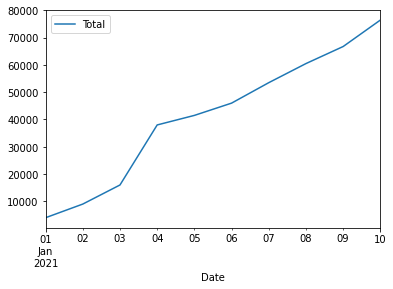

In [55]:
car_sales.plot(x='Date', y='Total')

<AxesSubplot:xlabel='Odometer (KM)', ylabel='Price'>

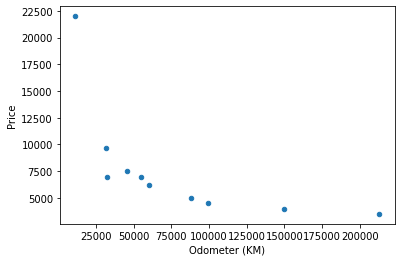

In [59]:
car_sales.plot(x='Odometer (KM)', y='Price', kind='scatter')

<AxesSubplot:xlabel='Make'>

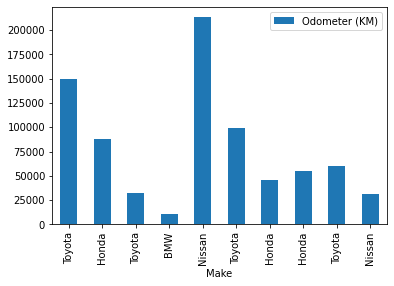

In [61]:
car_sales.plot(x='Make', y='Odometer (KM)', kind='bar')

<AxesSubplot:ylabel='Frequency'>

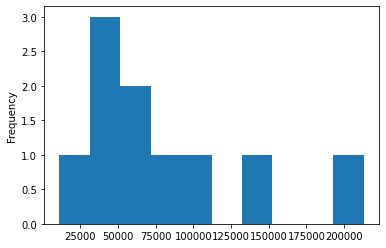

In [62]:
car_sales['Odometer (KM)'].plot.hist()